In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Excel file, skipping metadata rows
file_path = r"D:\Teaching\SCMA632 2025 C51\Assignments\Data\pink_sheet.xlsx"
df = pd.read_excel(file_path, sheet_name="Monthly Prices", skiprows=6)

In [39]:
df.head

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.630000,1.630,1.63,…,…,…,0.1400,0.404774,…,...,511.471832,11.42,715.40,206.10,2180.40,1631.00,260.80,35.27,83.50,0.9137
1,1960M02,1.630000,1.630,1.63,…,…,…,0.1400,0.404774,…,...,511.471832,11.42,728.19,203.70,2180.40,1631.00,244.90,35.27,83.50,0.9137
2,1960M03,1.630000,1.630,1.63,…,…,…,0.1400,0.404774,…,...,511.471832,11.42,684.94,210.30,2173.80,1631.00,248.70,35.27,83.50,0.9137
3,1960M04,1.630000,1.630,1.63,…,…,…,0.1400,0.404774,…,...,511.471832,11.42,723.11,213.60,2178.20,1631.00,254.60,35.27,83.50,0.9137
4,1960M05,1.630000,1.630,1.63,…,…,…,0.1400,0.404774,…,...,511.471832,11.42,684.75,213.40,2162.70,1631.00,253.80,35.27,83.50,0.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2025M02,73.819000,75.157,74.97,71.33,106.93,100.41,4.2226,15.340532,12.781781,...,2657.600000,105.08,9330.60,1956.55,31832.96,15288.09,2800.14,2894.73,978.25,32.1520
782,2025M03,70.701333,72.574,71.71,67.82,103.97,97.99,4.1281,13.235407,12.545449,...,2658.290000,100.10,9739.68,2033.21,34047.87,16065.69,2889.29,2983.25,980.05,33.1880
783,2025M04,65.905000,67.745,66.89,63.08,98.61,95.56,3.3998,11.590293,12.680004,...,2371.600000,97.24,9176.80,1903.46,32565.05,15113.29,2621.55,3217.64,958.81,32.2250
784,2025M05,62.748667,64.206,63.01,61.03,104.41,94.33,3.1152,11.663466,12.321969,...,2448.790000,96.97,9532.98,1957.75,31981.17,15345.79,2644.37,3309.49,979.50,32.7630


In [30]:
# Step 2: Rename first column to 'Date' and parse it into datetime
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'].str.replace('M', ''), format='%Y%m')

In [40]:
df.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


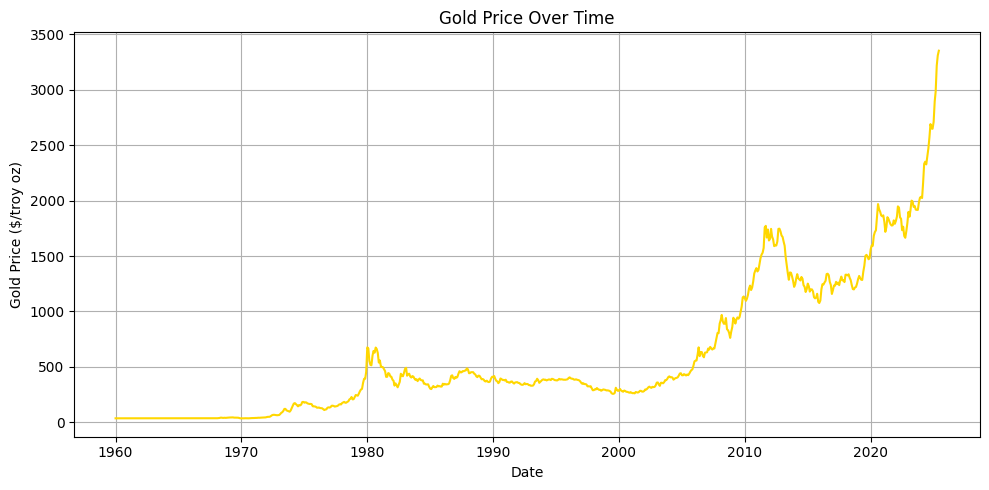

In [36]:
# Step 3: Detect the GOLD column (auto-detect by name)
gold_column = [col for col in df.columns if 'GOLD' in str(col).upper()]

# Step 4: Check and proceed if gold column exists
if gold_column:
    gold_df = df[['Date', gold_column[0]]].dropna()
    gold_df.set_index('Date', inplace=True)

    # Step 5: Plot the time series
    plt.figure(figsize=(10, 5))
    plt.plot(gold_df.index, gold_df[gold_column[0]], color='gold')
    plt.title("Gold Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Gold Price ($/troy oz)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Gold column not found. Please verify column names:")
    print(df.columns)